条件GAN模型将标签作为输入并输出图像。

我们以“biggan”为例。

## 进入 MMEditing 主目录

In [1]:
import os
os.chdir('mmediting')
os.listdir()

['.git',
 '.circleci',
 '.dele.yml',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmedit',
 'model-index.yml',
 'projects',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmedit.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs',
 'indexnet_mobv2_1x16_78k_comp1k_SAD-45.6_20200618_173817-26dd258d.pth',
 'resources']

In [2]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# 创建一个MMEdit实例并推断
result_out_dir = 'resources/output/conditional/tutorial_conditinal_biggan_res.jpg'
editor = MMEdit('biggan', model_setting=1)
results = editor.infer(label=1, result_out_dir=result_out_dir)

/environment/miniconda3/lib/python3.7/site-packages/mmcv/cnn/bricks/conv_module.py:154: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth
02/21 15:58:59 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.


/environment/miniconda3/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:163: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


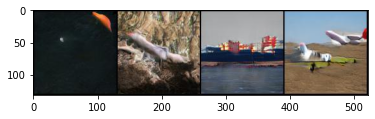

In [3]:
# 绘制结果图像
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 修复模型的推理

修复模型将被掩蔽的图像和掩蔽对作为输入，并输出被修复的图像。
我们以‘global_local’为例。

In [5]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

img = 'resources/input/inpainting/celeba_test.png'
mask = 'resources/input/inpainting/bbox_mask.png'

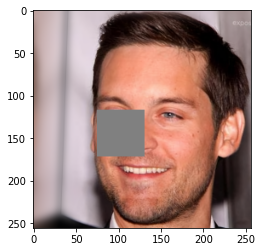

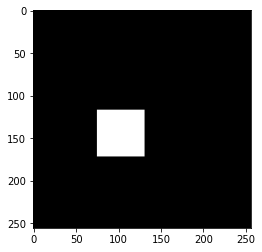

In [6]:
# 显示输入图像和遮罩
input_img = mmcv.imread(img)
plt.imshow(mmcv.bgr2rgb(input_img))
plt.show()
input_mask = mmcv.imread(mask)
plt.imshow(mmcv.bgr2rgb(input_mask))
plt.show()

In [7]:
# 创建一个MMEdit实例并推断
result_out_dir = 'resources/output/inpainting/tutorial_inpainting_global_local_res.jpg'
editor = MMEdit('global_local', model_setting=1)
results = editor.infer(img=img, mask=mask, result_out_dir=result_out_dir)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_celeba_20200619-5af0493f.pth


Downloading: "https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_celeba_20200619-5af0493f.pth" to /home/featurize/.cache/torch/hub/checkpoints/gl_256x256_8x12_celeba_20200619-5af0493f.pth


02/21 15:54:53 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.


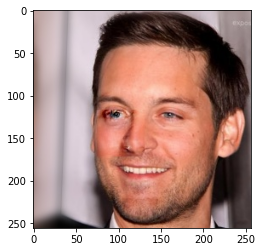

In [8]:
# 绘制结果图像
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 图像超分辨率模型的推断

图像超分辨率模型将图像作为输入，并输出高分辨率图像。我们以‘esrgan’为例。

In [ ]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# 创建一个MMEdit实例并推断
img = 'resources/input/restoration/0901x2.png'
result_out_dir = 'resources/output/restoration/tutorial_restoration_esrgan_res.png'
editor = MMEdit('esrgan')
results = editor.infer(img=img, result_out_dir=result_out_dir)

# 绘制结果图像
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 图像翻译模型的推理

图像翻译模型将图像作为输入，并输出翻译后的图像。我们以‘pix2pix’为例。

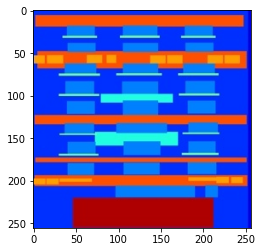

In [6]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

img = 'resources/input/translation/gt_mask_0.png'

# 显示输入图像和遮罩
input_img = mmcv.imread(img)
plt.imshow(mmcv.bgr2rgb(input_img))
plt.show()

In [7]:
# 创建一个MMEdit实例并推断
result_out_dir = 'resources/output/translation/tutorial_translation_pix2pix_res.png'
editor = MMEdit('pix2pix')
results = editor.infer(img=img, result_out_dir=result_out_dir)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth
02/21 16:03:43 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.


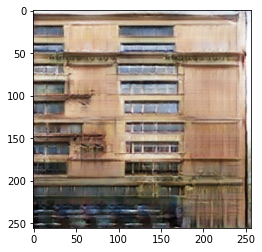

In [8]:
# 绘制结果图像
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()